In [39]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))  # Add the project root to sys.path

import neptune
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
project = neptune.init_project(
    project="OCTAA/OCTSegmenter",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MGU2NGNjMi0yNWE0LTRjNzgtOGNlNS1hZDdkMjJhYzYxMWUifQ==",
    mode="read-only",
)

runs_table_df = project.fetch_runs_table().to_pandas()
runs_table_df.head()


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/


,sys/creation_time,sys/description,sys/failed,sys/group_tags,sys/hostname,sys/id,sys/modification_time,sys/monitoring_time,sys/name,sys/owner,...,monitoring/da82a5a3/stderr,monitoring/da82a5a3/stdout,monitoring/da82a5a3/tid,monitoring/e7bb4b5c/cpu,monitoring/e7bb4b5c/hostname,monitoring/e7bb4b5c/memory,monitoring/e7bb4b5c/pid,monitoring/e7bb4b5c/stderr,monitoring/e7bb4b5c/stdout,monitoring/e7bb4b5c/tid
0,2024-12-04 23:40:02.653,,False,"MedSam,AdamW,Fold: 0,Freezing: True,DiceBCELos...",nid005039,OCT-361,2024-12-05 08:38:48.246,8892,trial_02687_00001,johanrubak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-04 18:57:18.578,,False,"Fold: 0,Unet,DiceBCELoss,Freezing: True,AdamW,...",nid005029,OCT-360,2024-12-04 20:37:10.689,5992,trial_381ce_00001,johanrubak,...,Checkpoint successfully created at: Checkpoint...,[neptune] [info ] Shutting down background j...,22216370730752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-04 16:58:57.317,,False,"Freezing: False,AdamW,DiceBCELoss,Fold: 0,MedS...",nid005039,OCT-358,2024-12-04 23:38:51.409,23992,trial_02687_00000,johanrubak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-04 15:38:51.138,,False,"AdamW,AttentionUnet,Freezing: True,DiceBCELoss...",nid005026,OCT-355,2024-12-04 18:04:50.720,8759,trial_96684_00001,johanrubak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-04 15:20:12.446,,False,"Unet,DiceBCELoss,Fold: 0,AdamW,Freezing: False...",nid005029,OCT-354,2024-12-04 18:56:35.780,12982,trial_381ce_00000,johanrubak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Filter runs where 'Second_training' is part of the 'sys/group_tags'
second_training_runs = runs_table_df[runs_table_df["sys/group_tags"].str.contains("Second_training")]
second_training_runs.head()


,sys/creation_time,sys/description,sys/failed,sys/group_tags,sys/hostname,sys/id,sys/modification_time,sys/monitoring_time,sys/name,sys/owner,...,monitoring/da82a5a3/stderr,monitoring/da82a5a3/stdout,monitoring/da82a5a3/tid,monitoring/e7bb4b5c/cpu,monitoring/e7bb4b5c/hostname,monitoring/e7bb4b5c/memory,monitoring/e7bb4b5c/pid,monitoring/e7bb4b5c/stderr,monitoring/e7bb4b5c/stdout,monitoring/e7bb4b5c/tid
0,2024-12-04 23:40:02.653,,False,"MedSam,AdamW,Fold: 0,Freezing: True,DiceBCELos...",nid005039,OCT-361,2024-12-05 08:38:48.246,8892,trial_02687_00001,johanrubak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-04 18:57:18.578,,False,"Fold: 0,Unet,DiceBCELoss,Freezing: True,AdamW,...",nid005029,OCT-360,2024-12-04 20:37:10.689,5992,trial_381ce_00001,johanrubak,...,Checkpoint successfully created at: Checkpoint...,[neptune] [info ] Shutting down background j...,22216370730752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-04 16:58:57.317,,False,"Freezing: False,AdamW,DiceBCELoss,Fold: 0,MedS...",nid005039,OCT-358,2024-12-04 23:38:51.409,23992,trial_02687_00000,johanrubak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-04 15:38:51.138,,False,"AdamW,AttentionUnet,Freezing: True,DiceBCELoss...",nid005026,OCT-355,2024-12-04 18:04:50.720,8759,trial_96684_00001,johanrubak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-04 15:20:12.446,,False,"Unet,DiceBCELoss,Fold: 0,AdamW,Freezing: False...",nid005029,OCT-354,2024-12-04 18:56:35.780,12982,trial_381ce_00000,johanrubak,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
run = project["sys/id"].fetch()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-361


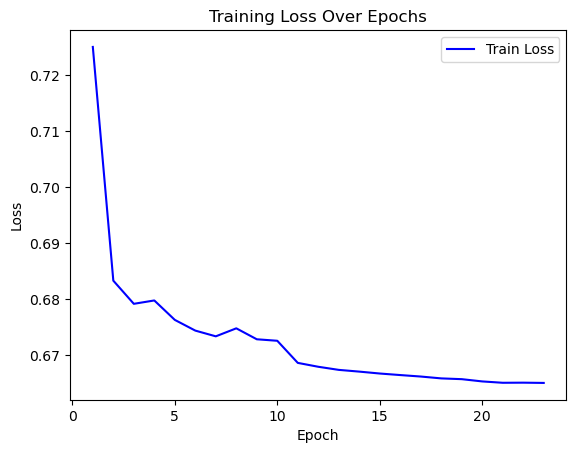

In [17]:
# Initialize Neptune run
run = neptune.init_run(
    project="OCTAA/OCTSegmenter",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MGU2NGNjMi0yNWE0LTRjNzgtOGNlNS1hZDdkMjJhYzYxMWUifQ==",
    mode="read-only",
    with_id="OCT-361",
)

# Retrieve the 'train_loss' values from the run
parameters = run['parameters'].fetch()  # Assumes 'train_loss' is logged as a series
train_loss = run['train_loss'].fetch_values()

# Convert to a list if it's not in list form
train_loss_values = train_loss['value'].tolist()

# Create an index for epochs or steps (if necessary)
epochs = list(range(1, len(train_loss_values) + 1))

# Plotting
plt.plot(epochs, train_loss_values, label='Train Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-361
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-360
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-358
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-355
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-354
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-352
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-334
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-330


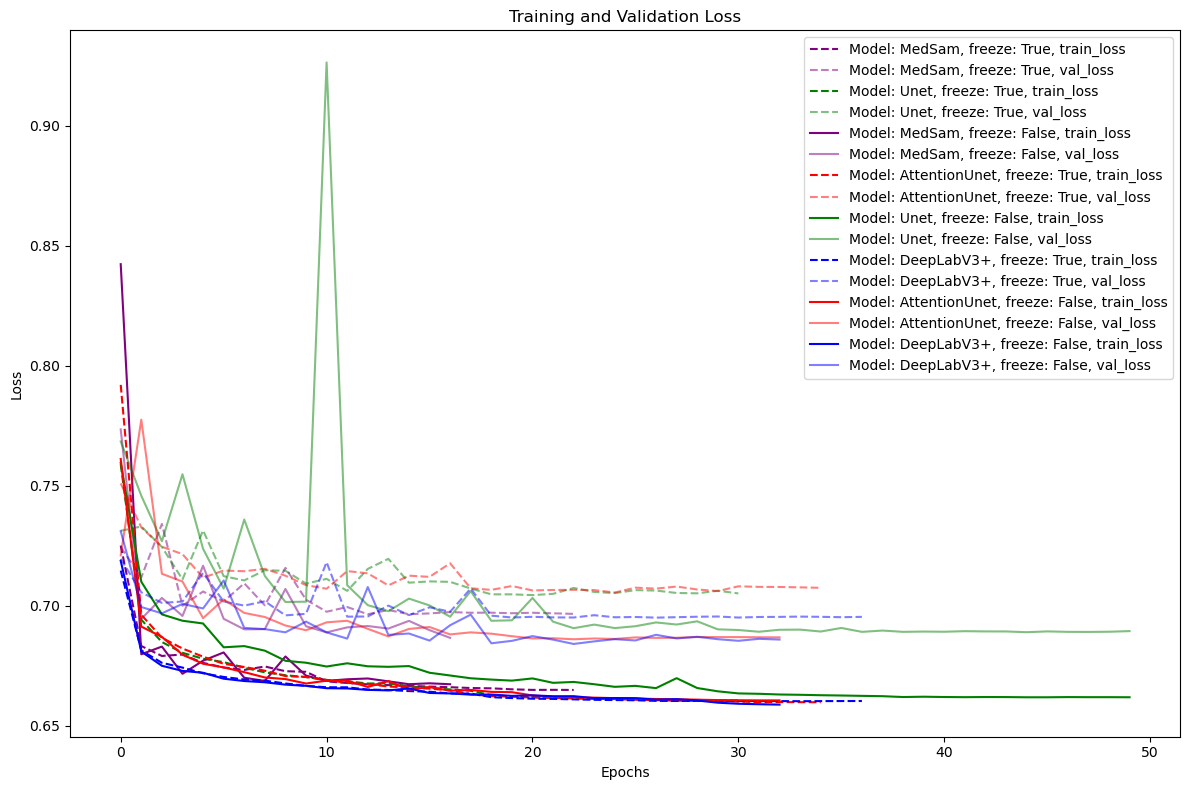

In [48]:
# Define a color map for different models
color_map = {
    'DeepLabV3+': 'blue',
    'Unet': 'green',
    'AttentionUnet': 'red',
    'MedSam': 'purple'
}

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate over the filtered runs and plot their losses
for _, row in second_training_runs.iterrows():
    run_id = row["sys/id"]

    if run_id != "OCT-349":
        run = neptune.init_run(
            project="OCTAA/OCTSegmenter",
            api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MGU2NGNjMi0yNWE0LTRjNzgtOGNlNS1hZDdkMjJhYzYxMWUifQ==",
            mode="read-only",
            with_id=run_id,
        )
        
        # Fetch train_loss and val_loss
        train_loss = run["train_loss"].fetch_values()
        val_loss = run["val_loss"].fetch_values()
        parameters = run["parameters"].fetch()
        
        # Ensure the data is sorted by step
        train_loss = train_loss.sort_values("step")
        val_loss = val_loss.sort_values("step")
        
        # Get the color for the model
        model = parameters['model']
        color = color_map.get(model, 'black')  # Default to black if model not in color_map
        
        if parameters["freeze_encoder"]:
            # Plot the losses
            plt.plot(train_loss["step"], train_loss["value"], label=f"Model: {model}, freeze: {parameters['freeze_encoder']}, train_loss", linestyle='dashed', color=color)
            plt.plot(val_loss["step"], val_loss["value"], label=f"Model: {model}, freeze: {parameters['freeze_encoder']}, val_loss", linestyle='dashed', color=color, alpha=0.5)
        
        else:
            # Plot the losses
            plt.plot(train_loss["step"], train_loss["value"], label=f"Model: {model}, freeze: {parameters['freeze_encoder']}, train_loss", color=color)
            plt.plot(val_loss["step"], val_loss["value"], label=f"Model: {model}, freeze: {parameters['freeze_encoder']}, val_loss", color=color, alpha=0.5)

# Customize the plot
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()  # Adjust legend size and location
plt.grid(False)
plt.tight_layout()
plt.show()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-355
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-334
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-352
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-330
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-361
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-358
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-360
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-354


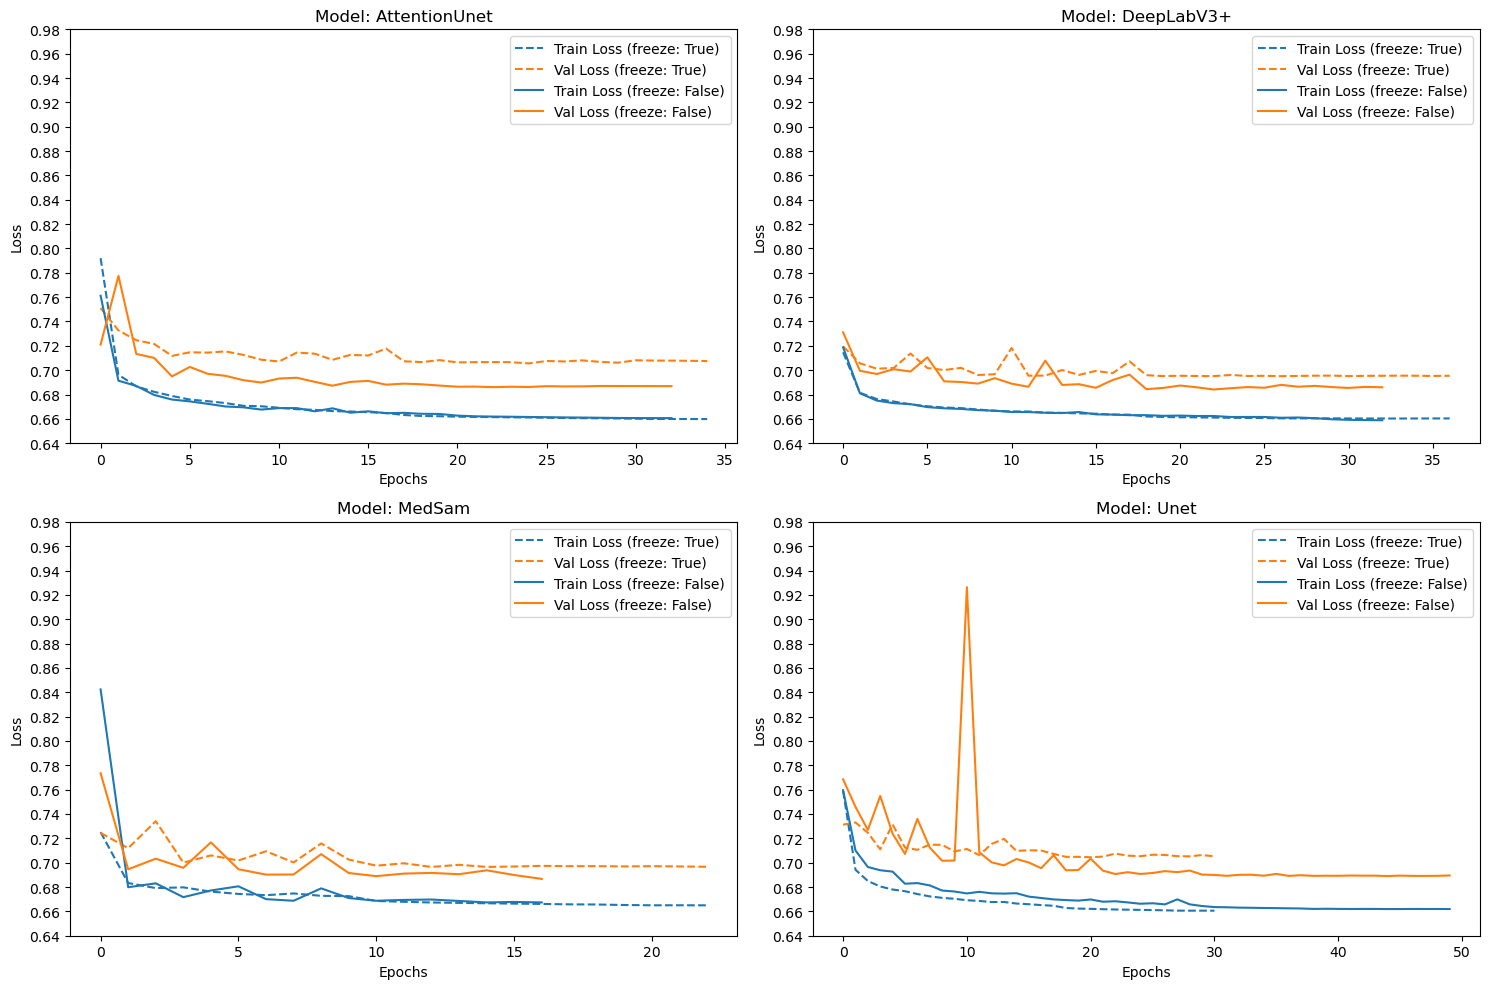

In [61]:
# Initialize the plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Define common ticks
y_ticks = np.arange(0.64, 1, 0.02)

# Iterate over the filtered runs and plot their losses
for idx, (model, group) in enumerate(second_training_runs.groupby('parameters/model')):
    ax = axes[idx]
    for _, row in group.iterrows():
        run_id = row["sys/id"]

        if run_id != "OCT-349":
            run = neptune.init_run(
                project="OCTAA/OCTSegmenter",
                api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MGU2NGNjMi0yNWE0LTRjNzgtOGNlNS1hZDdkMjJhYzYxMWUifQ==",
                mode="read-only",
                with_id=run_id,
            )
            
            # Fetch train_loss and val_loss
            train_loss = run["train_loss"].fetch_values()
            val_loss = run["val_loss"].fetch_values()
            parameters = run["parameters"].fetch()
            
            # Ensure the data is sorted by step
            train_loss = train_loss.sort_values("step")
            val_loss = val_loss.sort_values("step")
            
            linestyle = 'dashed' if parameters["freeze_encoder"] else 'solid'
            
            # Plot the losses
            ax.plot(train_loss["step"], train_loss["value"], label=f"Train Loss (freeze: {parameters['freeze_encoder']})", linestyle=linestyle, c='#1f77b4')
            ax.plot(val_loss["step"], val_loss["value"], label=f"Val Loss (freeze: {parameters['freeze_encoder']})", linestyle=linestyle, c='#ff7f0e')
    
    ax.set_title(f"Model: {model}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(False)
    
    # Set common ticks
    ax.set_yticks(y_ticks)

plt.tight_layout()
plt.show()


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-361
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-360
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-358
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-355
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-354
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-352
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-334
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-330


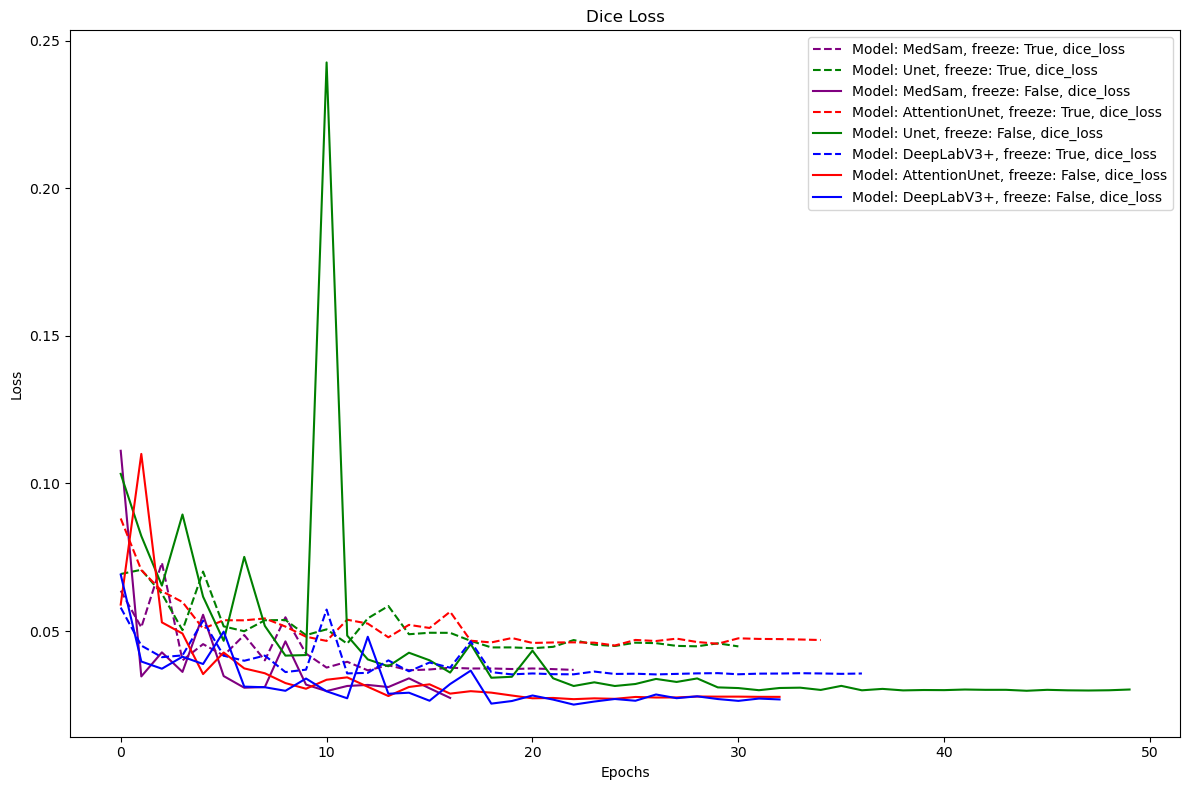

In [51]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate over the filtered runs and plot their losses
for _, row in second_training_runs.iterrows():
    run_id = row["sys/id"]

    if run_id != "OCT-349":
        run = neptune.init_run(
            project="OCTAA/OCTSegmenter",
            api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MGU2NGNjMi0yNWE0LTRjNzgtOGNlNS1hZDdkMjJhYzYxMWUifQ==",
            mode="read-only",
            with_id=run_id,
        )
        
        # Fetch dice_loss and parameters
        dice_loss = run["dice_loss"].fetch_values()
        parameters = run["parameters"].fetch()
        
        # Ensure the data is sorted by step
        dice_loss = dice_loss.sort_values("step")
        
        # Get the color for the model
        model = parameters['model']
        color = color_map.get(model, 'black')  # Default to black if model not in color_map
        
        # Plot the losses
        if parameters["freeze_encoder"]:
            plt.plot(dice_loss["step"], dice_loss["value"], label=f"Model: {model}, freeze: {parameters['freeze_encoder']}, dice_loss", linestyle='dashed', color=color)
        else:
            plt.plot(dice_loss["step"], dice_loss["value"], label=f"Model: {model}, freeze: {parameters['freeze_encoder']}, dice_loss", color=color)

# Customize the plot
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Dice Loss")
plt.legend(loc="upper right")  # Correct legend
plt.grid(False)
plt.tight_layout()
plt.show()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-355
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-334
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-352
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-330
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-361
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-358
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-360
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/OCTAA/OCTSegmenter/e/OCT-354


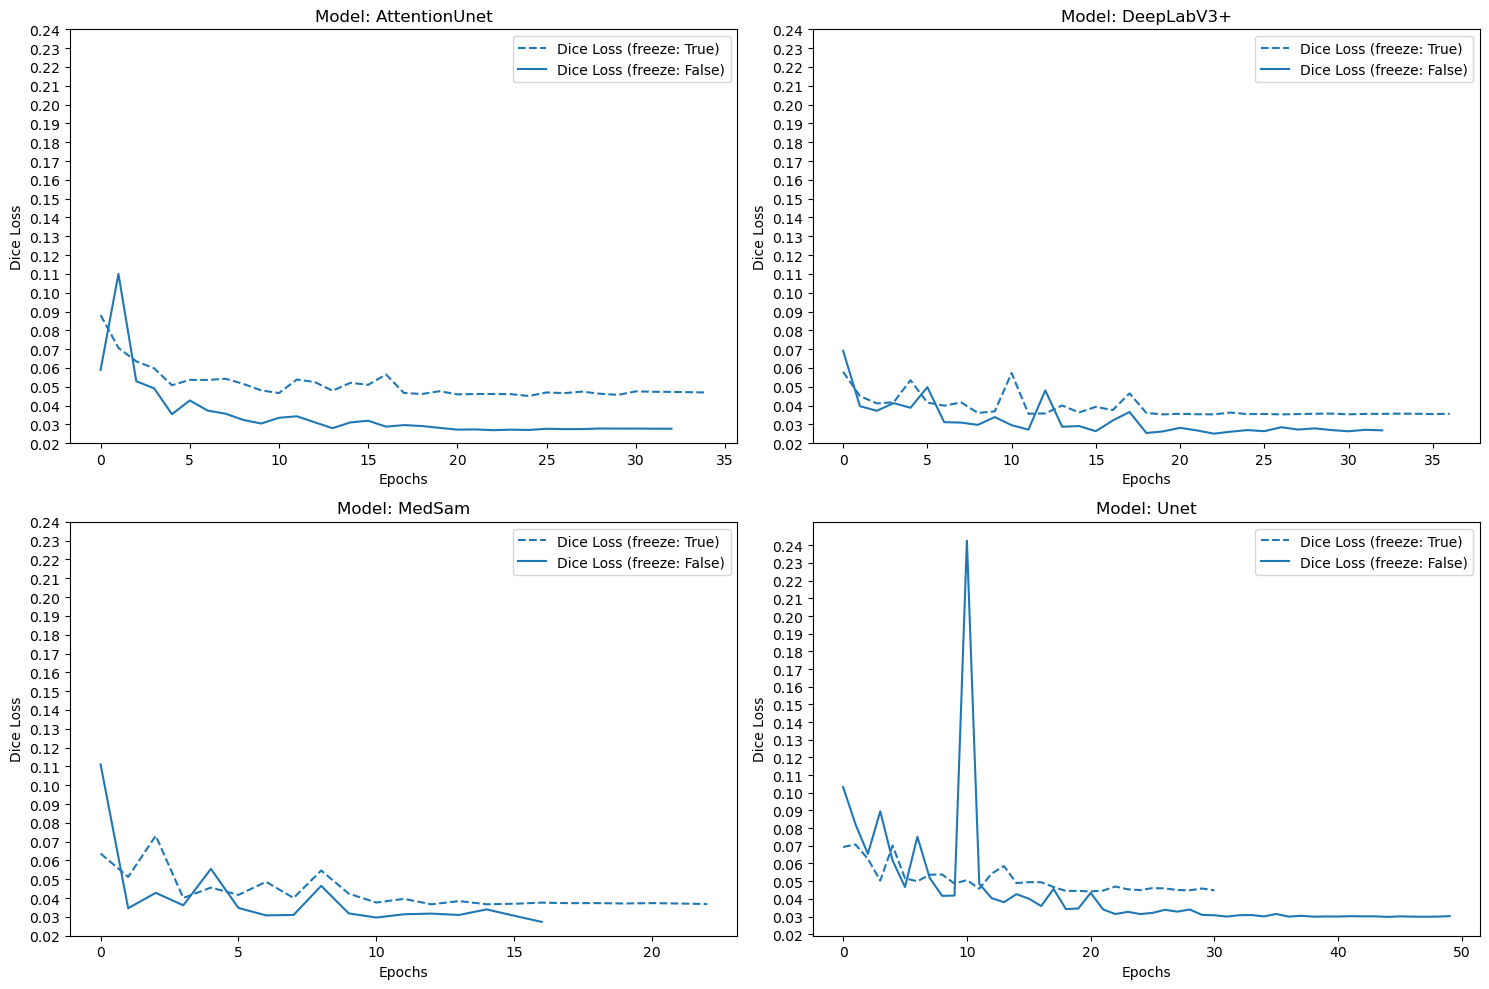

In [68]:
# Initialize the plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Define common ticks
y_ticks = np.arange(0.02, 0.250, 0.01)

# Iterate over the filtered runs and plot their dice losses
for idx, (model, group) in enumerate(second_training_runs.groupby('parameters/model')):
    ax = axes[idx]
    for _, row in group.iterrows():
        run_id = row["sys/id"]

        if run_id != "OCT-349":
            run = neptune.init_run(
                project="OCTAA/OCTSegmenter",
                api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2MGU2NGNjMi0yNWE0LTRjNzgtOGNlNS1hZDdkMjJhYzYxMWUifQ==",
                mode="read-only",
                with_id=run_id,
            )
            
            # Fetch dice_loss
            dice_loss = run["dice_loss"].fetch_values()
            parameters = run["parameters"].fetch()
            
            # Ensure the data is sorted by step
            dice_loss = dice_loss.sort_values("step")
            
            linestyle = 'dashed' if parameters["freeze_encoder"] else 'solid'
            
            # Plot the dice losses
            ax.plot(dice_loss["step"], dice_loss["value"], label=f"Dice Loss (freeze: {parameters['freeze_encoder']})", linestyle=linestyle, c='#1f77b4')
    
    ax.set_title(f"Model: {model}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Dice Loss")
    ax.legend()
    ax.grid(False)
    
    # Set common ticks
    ax.set_yticks(y_ticks)

plt.tight_layout()
plt.show()
